In [6]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import torchvision.datasets as datasets
import torch.utils.data as data
import matplotlib.pyplot as plt



In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=None)
model.fc = nn.Linear(512, 10)
model.load_state_dict(torch.load("resnet18_cifar10.pth", map_location=device))
model = model.to(device)
model.eval()

/tmp/ipykernel_296826/75242486.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("resnet18_cifar10.pth", map_location=device))


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
# Define Transform

transform = transforms.Compose([
    transforms.Resize((224, 224)), # Match training preprocessing
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
# Load CIFAR10 test set

test_data = datasets.CIFAR10(root="data", train=False, download=True, transform=transform)
test_loader = data.DataLoader(test_data, batch_size=1, shuffle=True)



100%|██████████| 170M/170M [03:07<00:00, 910kB/s]  


Extracting data/cifar-10-python.tar.gz to data


In [17]:
# Get a random image sample
images, labels = next(iter(test_loader))
images = images.to(device)

In [18]:
# Load Image and Predict
#img = Image.open("sample.jpg").convert("RGB")
#img_tensor = transforms(img).unsqueeze(0).to(device)

# Inference
with torch.no_grad():
    output = model(images)
    _, predicted = torch.max(output, 1)

cifar10_classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

print(f'Predicted: {cifar10_classes[predicted.item()]}')

Predicted: horse


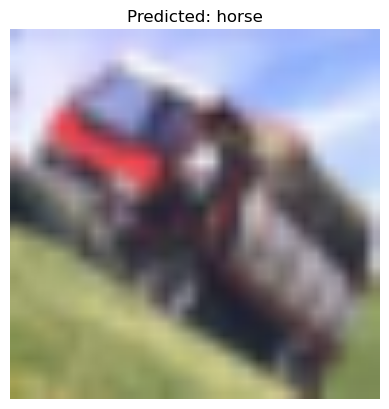

In [19]:
plt.imshow((images[0].cpu().permute(1, 2, 0) * 0.5) + 0.5) # Undo normalization
plt.title(f'Predicted: {cifar10_classes[predicted.item()]}')
plt.axis('off')
plt.show()